In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


pd.set_option('float_format', '{:6.3f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,4

In [3]:
df = pd.read_csv('rurusdbrent.txt',sep='\\t', index_col =[0,1])

In [4]:
#1
df['logrubusd'] = np.log(df['rubusdavg'])
df['logwti'] = np.log(df['wtiprice'])

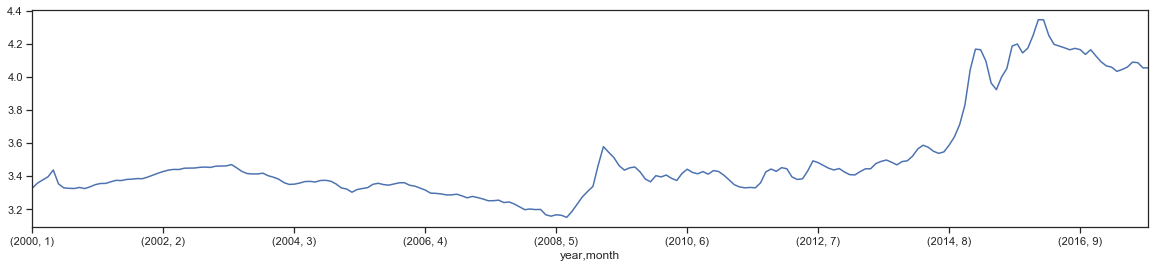

In [5]:
df['logrubusd'].plot()
plt.show()

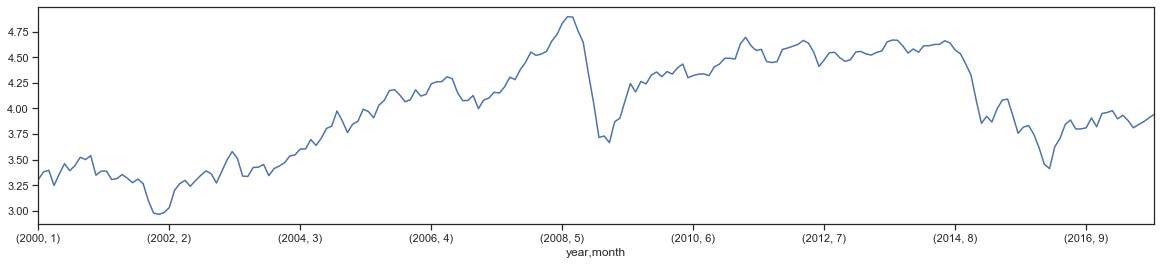

In [6]:
df['logwti'].plot()
plt.show()

They does not look stationary because there is a high correlation between lags, it lasts quite long. Moreover, these series include some trends.

In [7]:
#2
df['dif_log_ex'] = df['logrubusd'].diff(1)
df['dif_log_wti'] = df['logwti'].diff(1)

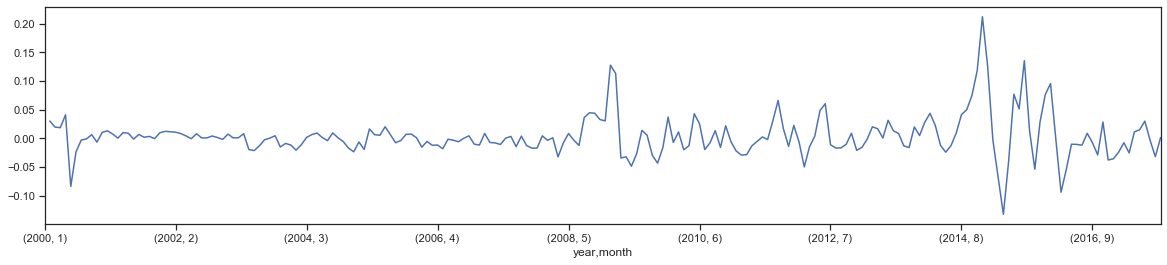

In [8]:
df['dif_log_ex'].plot()
plt.show()

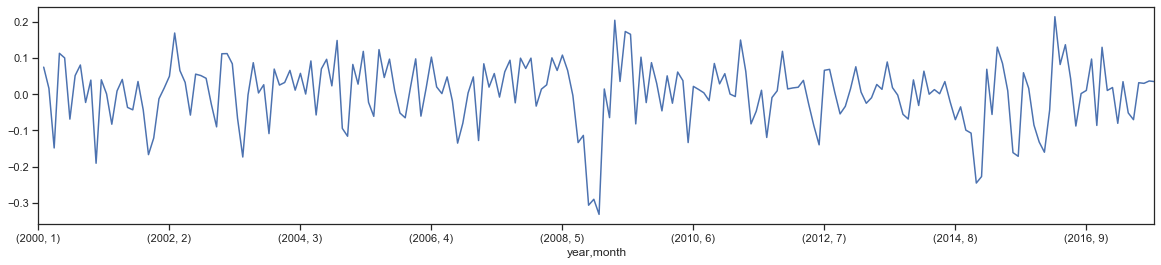

In [9]:
df['dif_log_wti'].plot()
plt.show()

These both series look stationary now

In [10]:
#3
from statsmodels.tsa.stattools import adfuller
adfuller(df['dif_log_ex'].dropna(), autolag = 'BIC')

(-9.655541061042682,
 1.3973963535539492e-16,
 1,
 211,
 {'1%': -3.46172743446274,
  '5%': -2.8753374677799957,
  '10%': -2.574124089081557},
 -828.3465851884026)

In [11]:
adfuller(df['dif_log_wti'].dropna(),autolag = 'BIC')

(-10.936909345005803,
 9.508945033310446e-20,
 0,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 -407.5099728592967)

The second number is p-value in the row, hypothesis H0 is rejected in both cases, therefore these series do not have unit roots and we may say that they are stationary. In this case, when we do not input the number of lags, the function automatically chooses the best number of lags to minimize the information criteria. This function also uses just a constant by default

In [12]:
# with Trend
adfuller(df['dif_log_ex'].dropna(), autolag = 'BIC',regression='ct')

(-9.723159608065824,
 9.045747658035235e-15,
 1,
 211,
 {'1%': -4.002328498364529,
  '5%': -3.431505373478898,
  '10%': -3.1393945714685367},
 -824.2632114845283)

In [13]:
adfuller(df['dif_log_wti'].dropna(),autolag = 'BIC',regression='ct')

(-10.944309580403798,
 2.8423816015646464e-17,
 0,
 212,
 {'1%': -4.002119902247325,
  '5%': -3.431405246268732,
  '10%': -3.1393359061507153},
 -402.9004660633647)

In [14]:
# no Trend
adfuller(df['dif_log_ex'].dropna(), autolag = 'BIC',regression='nc')

(-9.601046944120917,
 7.64031215461263e-17,
 1,
 211,
 {'1%': -2.5764176757036004,
  '5%': -1.9423452443497828,
  '10%': -1.615619492182772},
 -832.5111425740064)

In [15]:
adfuller(df['dif_log_wti'].dropna(),autolag = 'BIC',regression='nc')

(-10.955571524104831,
 8.895864089233938e-20,
 0,
 212,
 {'1%': -2.5763669268422924,
  '5%': -1.9423385751534825,
  '10%': -1.6156248940568387},
 -412.67693632982747)

According to the test results there is probably no explicit trend or constant because p-value in the different computations have similar values.

In [16]:
#4
from statsmodels.tsa.stattools import kpss
kpss(df['dif_log_ex'].dropna(),lags=1)

(0.1933537420460824,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [17]:
kpss(df['dif_log_wti'].dropna(),lags=0)

(0.1940000965161834,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

We may see these both series are stationary because H0 is not rejected, p-value 

In [18]:
#Q2
#2
df['lbrent'] = np.log(df['brentprice'])

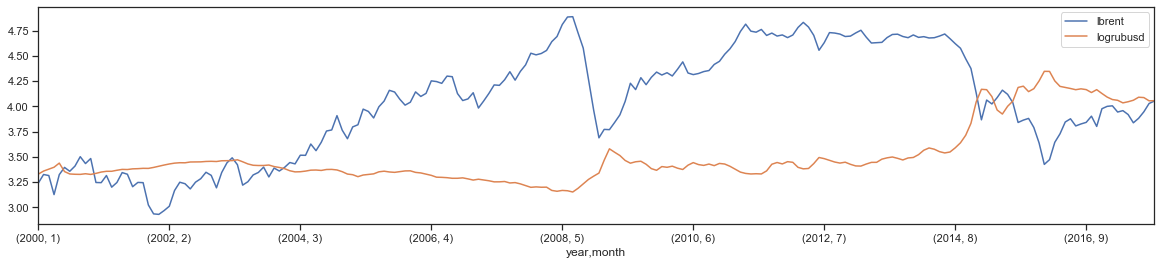

In [19]:
df['lbrent'].plot()
df['logrubusd'].plot()
plt.legend(['lbrent','logrubusd'])
plt.show()

If we look at the plot it explicitly shows that there is a pattern between the series. They go into opposite directions

#3
Spurious regression is a regression when we regress both series on each other and they both have trends, the result of this regression may show us that there is a correlation between these series but in reality they just coincide in directions (I mean they may go in different directions or in the same directions) and do not have any correlation.

In [20]:
#4
from statsmodels.regression.linear_model import OLS
model = OLS(df['logrubusd'] , sm.add_constant(df['lbrent'],))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              logrubusd   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.149
Date:                Sun, 01 Mar 2020   Prob (F-statistic):            0.00809
Time:                        21:55:58   Log-Likelihood:                -38.176
No. Observations:                 214   AIC:                             80.35
Df Residuals:                     212   BIC:                             87.08
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7759      0.110     34.375      0.0

B1 is a statistically significant coefficient because p-value shows that H0 is rejected. R^2 is so little that the model does not explain any relationship between the series  

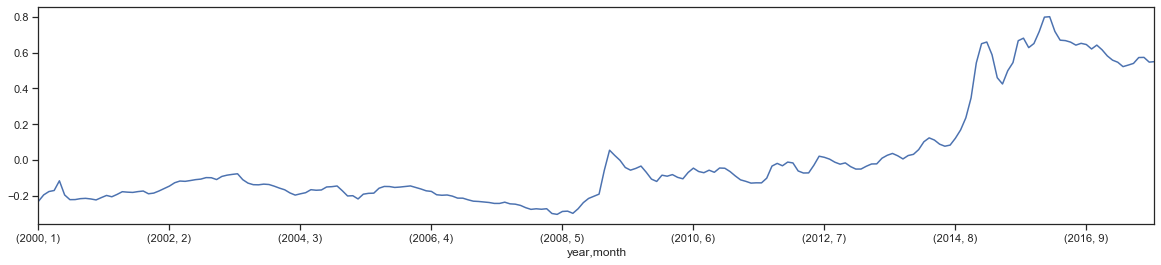

In [21]:
result.resid.plot()
plt.show()

In [26]:
adfuller(result.resid, maxlag = 2,regression='ct')

(-1.6621607540562662,
 0.7671554073512692,
 2,
 211,
 {'1%': -4.002328498364529,
  '5%': -3.431505373478898,
  '10%': -3.1393945714685367},
 -911.6717037872445)

In [23]:
from statsmodels.tsa.stattools import coint
coint(df['logrubusd'],df['lbrent'])

(-0.18256071959868372,
 0.9806291042263617,
 array([-3.94859636, -3.3649663 , -3.06442169]))

They are not cointegrated because the residuals from the regression follow a non-stationary process. According to the ADF test H0 is not rejected, therefore it is a non-stationary process. There is no the standard Dickey-Fuller test (in Python)

In [156]:
#6
from statsmodels.tsa.tsatools import add_trend
model = OLS(df['logrubusd'] , add_trend(df['lbrent'],trend = 'ct'))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              logrubusd   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1298.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          2.70e-119
Time:                        22:02:43   Log-Likelihood:                 255.10
No. Observations:                 214   AIC:                            -504.2
Df Residuals:                     211   BIC:                            -494.1
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lbrent        -0.4732      0.012    -40.810      0.0

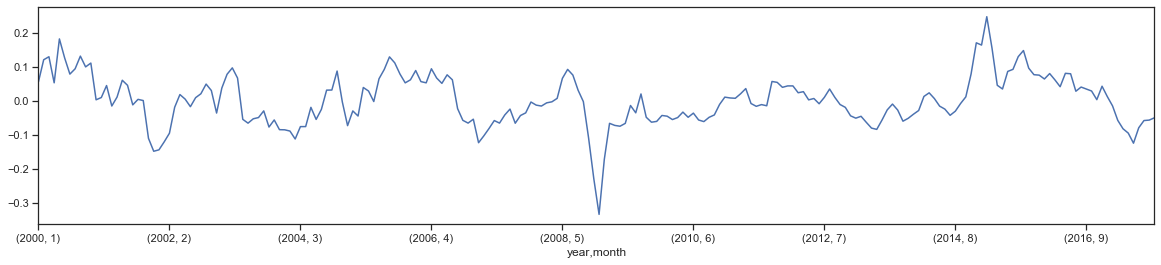

In [157]:
result.resid.plot()
plt.show()

In [164]:
adfuller(result.resid,maxlag=2)

(-4.945909886262362,
 2.8365866665908876e-05,
 1,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 -764.8979119061597)

#7
We may see that now the residuals are stationary, meaning that we find a linear combination of time series so that it would be stationary but there is also a trend. Nevertheless, with this trend these series have a long-run equilibrium realationship.